# Tip Prediction using Multiple Linear Regression
**Objective** :
- Multiple Linear Regression model from `tips` dataset to predict tip
- Create Error Distribution based on training result
- Create evaluation matrix result 

---

## Load package

In [228]:
## Import necessary package 
import sklearn
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

---

## Load dataset

In [229]:
## Load the tips dataset
df_tips = sns.load_dataset('tips')

In [230]:
## Preview the tips dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [231]:
## Information for each df_tips columns
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


---

## Feature Engineering - One Hot Encoding for Categorical Features

In [232]:
## Create dummy columns for categorical features
df_tips=pd.get_dummies(df_tips, columns=['sex','smoker','day','time'])
df_tips

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


---

## Splitting Dataset to Train and Test Set

In [233]:
## Import package
from sklearn.model_selection import train_test_split

In [234]:
# Define the feature and target columns
x = df_tips.drop(columns=['tip'])
y = df_tips['tip']

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [236]:
x_train.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
169,10.63,2,0,1,1,0,0,0,1,0,0,1
77,27.20,4,1,0,0,1,1,0,0,0,1,0
107,25.21,2,1,0,1,0,0,0,1,0,0,1
181,23.33,2,1,0,1,0,0,0,0,1,0,1
173,31.85,2,1,0,1,0,0,0,0,1,0,1


In [237]:
y_train.head()

169    2.00
77     4.00
107    4.29
181    5.65
173    3.18
Name: tip, dtype: float64

In [238]:
x_test.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
34,17.78,2,1,0,0,1,0,0,1,0,0,1
231,15.69,3,1,0,1,0,0,0,1,0,0,1
238,35.83,3,0,1,0,1,0,0,1,0,0,1
100,11.35,2,0,1,1,0,0,1,0,0,0,1
72,26.86,2,0,1,1,0,0,0,1,0,0,1


In [239]:
y_test.head()

34     3.27
231    3.00
238    4.67
100    2.50
72     3.14
Name: tip, dtype: float64

---

## Machine Learning Modelling using Multiple Linear Regression

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
Model = LinearRegression(fit_intercept=False)

In [242]:
Model.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [243]:
Model.score(x_train, y_train)

0.48785642535395235

---

## Error Distribution

In [244]:
pred_train = Model.predict(x_train)

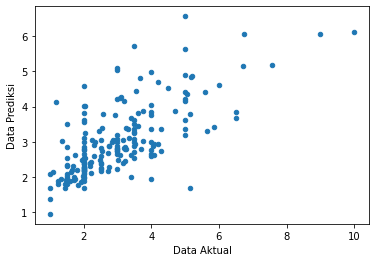

In [245]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.show()

In [246]:
Training_set=pd.concat([x_train, y_train],axis=1)

In [247]:
Training_set['tip_pred']=pred_train

In [248]:
Training_set['Error']= abs(Training_set['tip']-Training_set['tip_pred'])

In [249]:
Training_set.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip,tip_pred,Error
169,10.63,2,0,1,1,0,0,0,1,0,0,1,2.00,1.897604,0.102396
77,27.20,4,1,0,0,1,1,0,0,0,1,0,4.00,4.047524,0.047524
107,25.21,2,1,0,1,0,0,0,1,0,0,1,4.29,3.352758,0.937242
181,23.33,2,1,0,1,0,0,0,0,1,0,1,5.65,3.302854,2.347146
173,31.85,2,1,0,1,0,0,0,0,1,0,1,3.18,4.160186,0.980186


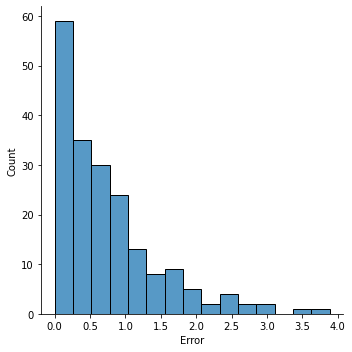

In [250]:
sns.displot(Training_set['Error'])
plt.show()

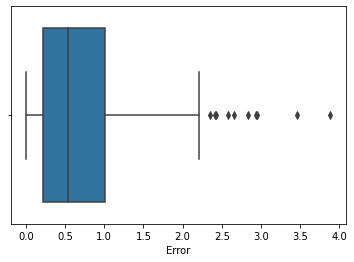

In [251]:
sns.boxplot(Training_set['Error'])
plt.show()

In [252]:
Training_set['Error'].mean()

0.743390997595227

In [253]:
Training_set.sort_values('Error', ascending=False).head(10)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip,tip_pred,Error
170,50.81,3,1,0,1,0,0,0,1,0,0,1,10.00,6.116597,3.883403
172,7.25,2,1,0,1,0,0,0,0,1,0,1,5.15,1.684790,3.465210
237,32.83,2,1,0,1,0,0,0,1,0,0,1,1.17,4.119527,2.949527
212,48.33,4,1,0,0,1,0,0,1,0,0,1,9.00,6.065200,2.934800
183,23.17,4,1,0,1,0,0,0,0,1,0,1,6.50,3.662387,2.837613
214,28.17,3,0,1,1,0,0,0,1,0,0,1,6.50,3.850398,2.649602
187,30.46,5,1,0,1,0,0,0,0,1,0,1,2.00,4.583766,2.583766
88,24.71,2,1,0,0,1,1,0,0,0,1,0,5.85,3.421332,2.428668
23,39.42,4,1,0,0,1,0,0,1,0,0,1,7.58,5.168623,2.411377
181,23.33,2,1,0,1,0,0,0,0,1,0,1,5.65,3.302854,2.347146


---

## Evaluation Matrix

In [254]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error

In [261]:
pred_test = Model.predict(x_test)

In [255]:
r2_train=r2_score(y_train,pred_train)
r2_train

0.48785642535395235

In [256]:
MAE_train = mean_absolute_error(y_train,pred_train)
MAE_train

0.743390997595227

In [257]:
MSE_train = mean_squared_error(y_train,pred_train)
MSE_train

1.0655302781013756

In [258]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

1.0322452606340102

In [259]:
print("Hasil Evaluation Matrix untuk Data Training")
print('='*50)
print('Nilai R Square =', r2_train.round(2))
print('Nilai MAE', MAE_train.round(2))
print('Nilai MSE', MSE_train.round(2))
print('Nilai RMSE', RMSE_train.round(2))

Hasil Evaluation Matrix untuk Data Training
Nilai R Square = 0.49
Nilai MAE 0.74
Nilai MSE 1.07
Nilai RMSE 1.03


In [262]:
r2_test=r2_score(y_test,pred_test)
r2_test

0.3091271058380858

In [263]:
MAE_test = mean_absolute_error(y_test,pred_test)
MAE_test

0.7033615495867258

In [264]:
MSE_test = mean_squared_error(y_test,pred_test)
MSE_test

0.8278916060989

In [265]:
RMSE_test = np.sqrt(MSE_train)
RMSE_test

1.0322452606340102

In [266]:
print("Hasil Evaluation Matrix untuk Data Test")
print('='*50)
print('Nilai R Square =', r2_train.round(2))
print('Nilai MAE', MAE_test.round(2))
print('Nilai MSE', MSE_test.round(2))
print('Nilai RMSE', RMSE_test.round(2))

Hasil Evaluation Matrix untuk Data Test
Nilai R Square = 0.49
Nilai MAE 0.7
Nilai MSE 0.83
Nilai RMSE 1.03


In [267]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Multiple Linear Regression Training':[r2_train,MAE_train,MSE_train,RMSE_train],
    'Multipler Linear Regression Testing':[r2_test,MAE_test,MSE_test,RMSE_test],
}
summary=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summary.T

,R-Squared,MAE,MSE,RMSE
Multiple Linear Regression Training,0.49,0.74,1.07,1.03
Multipler Linear Regression Testing,0.31,0.70,0.83,1.03
